In [2]:
import numpy as np
import pandas as pd
import random
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pickle

# Examine PCA Models

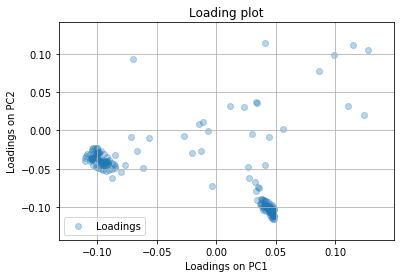

In [5]:
pickle_filename = "%s_pca_model.pkl" % seed
with open(pickle_filename, 'rb') as file:
    pca_model = pickle.load(file)
    
loadings = pca_model.components_
plt.scatter(*loadings, alpha=0.3, label="Loadings");

plt.title("Loading plot");
plt.xlabel("Loadings on PC1");
plt.ylabel("Loadings on PC2");
plt.grid();
plt.legend(loc='lower left');

In [6]:
loadings

array([[-0.09978514,  0.03740532, -0.09708238,  0.03840405, -0.09446689,
         0.03942361, -0.09192353,  0.03982425, -0.0897111 ,  0.04092893,
        -0.0876016 ,  0.04207531, -0.08605214,  0.04364607, -0.08481659,
         0.04541168, -0.08531129,  0.04692896, -0.08759243,  0.04817553,
        -0.09036543,  0.04837475, -0.09250954,  0.04835681, -0.09494204,
         0.047841  , -0.09692922,  0.04765113, -0.09907527,  0.04768666,
        -0.10080135,  0.04732571, -0.10343595,  0.03745406, -0.10004271,
         0.03783072, -0.10178364,  0.03890271, -0.10343432,  0.04053551,
        -0.10403304,  0.04208325, -0.10419316,  0.04535849, -0.1063011 ,
         0.04606412, -0.10829286,  0.04690183, -0.10968482,  0.04815671,
        -0.11060811,  0.04885609, -0.109939  ,  0.0447307 , -0.10339364,
         0.04470511, -0.10208411,  0.04501711, -0.10088785,  0.04515654,
        -0.09907273,  0.04411012, -0.09711558,  0.04476007, -0.09732124,
         0.04540717, -0.09740285,  0.04610517, -0.0

# Unstacking Training Patterns

In [4]:
for j in range(1):   
    seed=j
    goal_train_pca=np.load('Training_Out\%s_goal_train_pca.npy' % seed)
    goal_train_time=np.load('Training_Out\%s_goal_train_time.npy' % seed)

    goal_train_dict={}
    a=0
    for i in range(len(goal_train_time)):
        b=a+int(len(goal_train_time[i]))
        goal_train_dict[i]=goal_train_pca[a:b]
        a=b

    np.save('%s_goal_train_dict.npy' % seed, goal_train_dict)